In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import pickle

In [30]:
data = pd.read_csv('oversampled_data.csv')
data.head()
data['reviewText'] = data['reviewText'].astype(str)
data.dtypes

reviewText    object
sentiment     object
dtype: object

In [31]:

data['sentiment'].value_counts()

Positive    4444
Neutral     4444
Negative    4444
Name: sentiment, dtype: int64

In [32]:
nltk.download('stopwords')

# Load the CSV file
# Preprocess the review text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Apply the preprocessing function to the review text column
data['preprocessed_text'] = data['reviewText'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /home/pratik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
data.head()

,reviewText,sentiment,preprocessed_text
0,No issues.,Positive,issu .
1,"Purchased this for my device, it worked as adv...",Positive,"purchas devic , work advertis . never much pho..."
2,it works as expected. I should have sprung for...,Positive,work expect . sprung higher capac . think made...
3,This think has worked out great.Had a diff. br...,Positive,think work great.had diff . bran 64gb card wen...
4,It's mini storage. It doesn't do anything els...,Positive,'s mini storag . n't anyth els 's suppos . pur...


In [34]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data['preprocessed_text'],
    data['sentiment'],
    test_size=0.2,
    random_state=42
)


In [35]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data
train_features = vectorizer.fit_transform(train_data)

# Transform the testing data using the fitted vectorizer
test_features = vectorizer.transform(test_data)


In [36]:
classifier = MultinomialNB()
# Train the classifier
classifier.fit(train_features, train_labels)

# Evaluate the classifier on the testing data
accuracy = classifier.score(test_features, test_labels)
print('Accuracy:', accuracy)

Accuracy: 0.9235095613048369


Confusion Matrix:
[[868  21  20]
 [ 24 797  49]
 [ 45  45 798]]


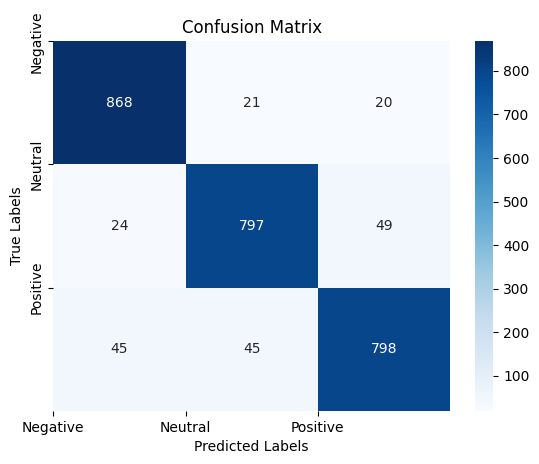

In [37]:
from sklearn.metrics import confusion_matrix
pred_labels = classifier.predict(test_features)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create confusion matrix
confusion_mat = confusion_matrix(test_labels, pred_labels)
print('Confusion Matrix:')
print(confusion_mat)
# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks to the heatmap
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(np.unique(test_labels))), labels=np.unique(test_labels))
plt.yticks(ticks=np.arange(len(np.unique(test_labels))), labels=np.unique(test_labels))

# Display the heatmap
plt.show()

In [38]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are the true labels and predicted labels, respectively
report = classification_report(test_labels, pred_labels)

print(report)


              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94       909
     Neutral       0.92      0.92      0.92       870
    Positive       0.92      0.90      0.91       888

    accuracy                           0.92      2667
   macro avg       0.92      0.92      0.92      2667
weighted avg       0.92      0.92      0.92      2667



In [39]:
review = "Hey there Mr.Oneplus Branch Head I have bought OnePlus Z2 ear phones on when it was realised at June 2022 now it's  ow working on left side of the bud and i came to the nearest service centre which is located in Rajajinagar.Now they are telling like there is slightly rubber damage in the right bud.When the durability tested in your workshop what can you guys gurranted for wear and tear?Now I am in a total loss of 1,900/-What can I am not satisfied with your OnePlus product and purchase in Amazon because got damaged before the warranty I am truly OnePlus user, but now your product is damaged and cannot be replaced due to right side rubber damage now your executives of Rajajinagar branch ARSHAD & his team and are not solving my problem and am reaching out to you with a email.Don't sell this worst product to anyone And I am totally not satisfied with your services of your products what i have purchased.I have faced WORST experience...I rate ZERO stars for your product and service.Regards your OnePlus user.Please don't buy this OnePlus Z2And please read the service terms and conditions before you guys buy it.Because it's life is only for 7-8 months."

# Transform the review using the same vectorizer
review_features = vectorizer.transform([review])

# Classify the review
predicted_sentiment = classifier.predict(review_features)

print('Predicted sentiment:', predicted_sentiment)

Predicted sentiment: ['Negative']


In [40]:
from sklearn.metrics import accuracy_score
y_train_pred = classifier.predict(train_features)
y_test_pred = classifier.predict(test_features)

# Calculate accuracy for training and testing data
train_accuracy = accuracy_score(train_labels, y_train_pred)
test_accuracy = accuracy_score(test_labels, y_test_pred)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)


Training Accuracy: 0.9323956868260665
Testing Accuracy: 0.9235095613048369


In [41]:
with open('classifier.pickle', 'wb') as file:
    pickle.dump(classifier, file)

with open('vectorizer.pickle', 'wb') as file:
    pickle.dump(vectorizer, file)